## Importing necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading the Dataset

In [2]:
dataset = pd.read_csv( 'dataset.csv' )

In [3]:
dataset.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
dataset.shape

(100000, 9)

In [5]:
#To check the name of features.
dataset.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
dataset.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
dataset.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


## Plotting the yes and no churn values

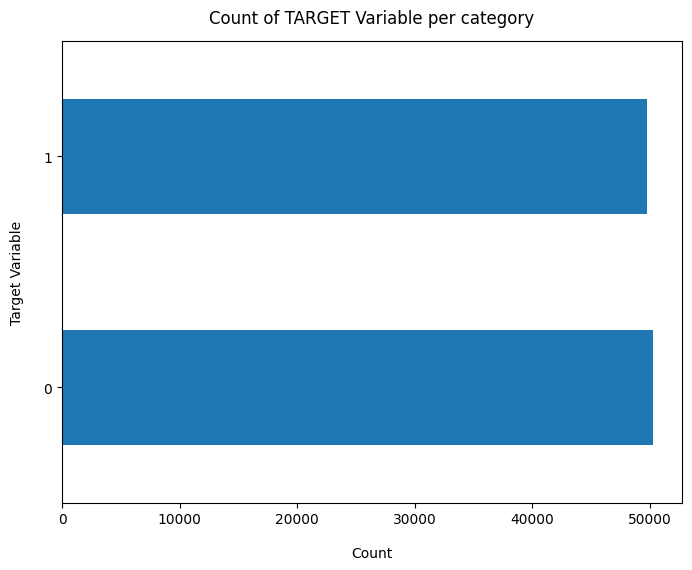

In [8]:
#1-yes and 0-no
dataset['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

The inference drawn is that the dataset is perfectly balanced, we can also print the number of yes and no values.

In [9]:
#100*dataset['Churn'].value_counts()/len(dataset['Churn'])
dataset['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

The dataset is nearly balanced, so we dont need to upscale or downscale it in order to balance it.

## Finding the number of missing values if any

In [10]:
no_val = dataset.isnull().sum()
print("Missing values in dataset.csv:")
print(no_val)

Missing values in dataset.csv:
CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


No null values were found so no need for interpolation.

# Data Exploration

C:\Users\HP\AppData\Local\Temp\ipykernel_22008\3750690712.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(dataset.Monthly_Bill[(dataset["Churn"] == 0) ],
C:\Users\HP\AppData\Local\Temp\ipykernel_22008\3750690712.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(dataset.Monthly_Bill[(dataset["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

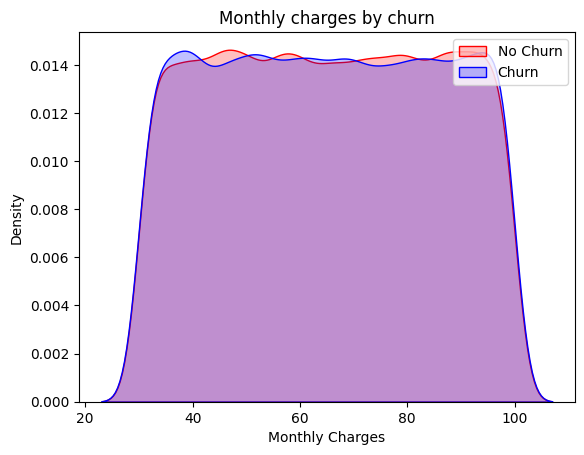

In [17]:
Mth = sns.kdeplot(dataset.Monthly_Bill[(dataset["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(dataset.Monthly_Bill[(dataset["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

We can see that our dataset is uniform and nicely balanced.

C:\Users\HP\AppData\Local\Temp\ipykernel_22008\2382821686.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(dataset.Total_Usage_GB[(dataset["Churn"] == 0) ],
C:\Users\HP\AppData\Local\Temp\ipykernel_22008\2382821686.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(dataset.Total_Usage_GB[(dataset["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

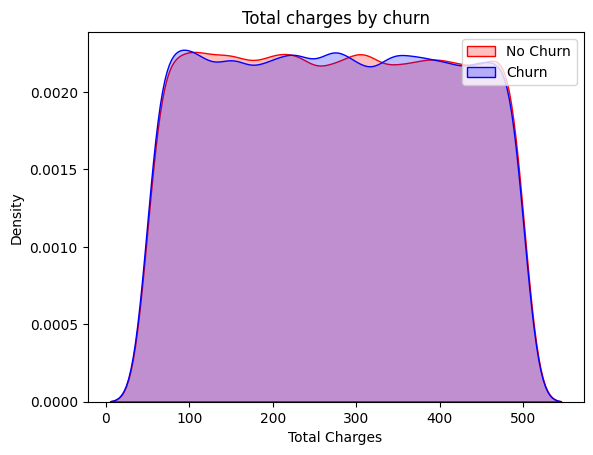

In [18]:
Tot = sns.kdeplot(dataset.Total_Usage_GB[(dataset["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(dataset.Total_Usage_GB[(dataset["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

C:\Users\HP\AppData\Local\Temp\ipykernel_22008\229209961.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap="Paired")


<Axes: >

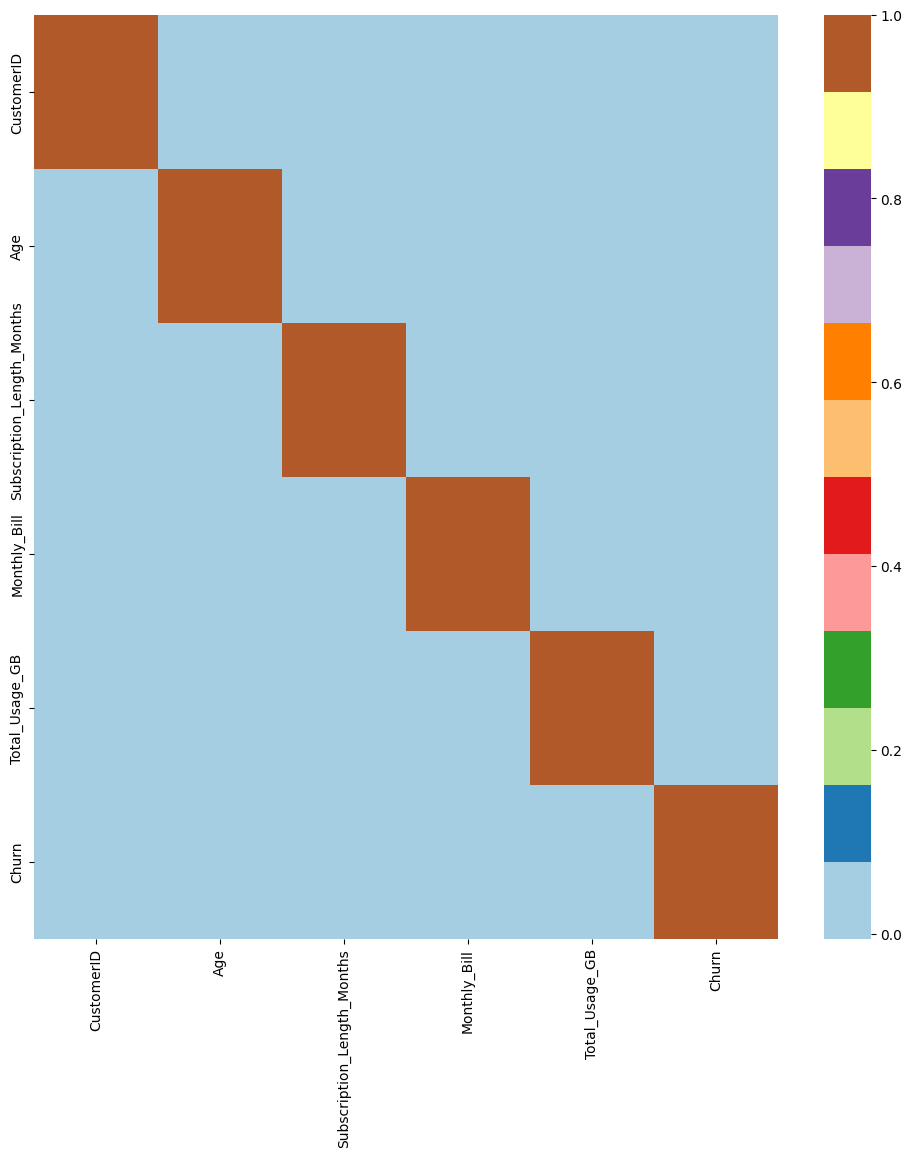

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), cmap="Paired")

## Encoding the data

In [ ]:
data_dummies = pd.get_dummies(dataset)
data_dummies.head()